In [2]:
import pandas as pd
import os

In [3]:
df = pd.read_csv('../Data/JNJ_Mkt_Data.csv')
df

,date,Open,High,Low,Close,Adjclose,Volume,Returns,Value_Traded,Market_Cap,...,20_EMA,55_EMA,200_EMA,RSI,MACD_Line,MACD_Sig,Hist,ADX,ROC,OBV
0,2010-01-04,64.71,64.9900,64.4600,64.68,43.962330,9508610,NaN,4.180207e+08,1.229626e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9508610.0
1,2010-01-05,64.58,64.6200,63.8200,63.93,43.452576,10675186,-0.011595,4.638643e+08,1.215369e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1166576.0
2,2010-01-06,63.90,64.5400,63.8300,64.45,43.805996,13173055,0.008133,5.770588e+08,1.225254e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12006479.0
3,2010-01-07,64.25,64.3500,63.7400,63.99,43.493355,10902891,-0.007137,4.742033e+08,1.216509e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1103588.0
4,2010-01-08,63.92,64.2600,63.6300,64.21,43.642876,7900225,0.003438,3.447885e+08,1.220691e+11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9003813.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351,2023-04-27,162.90,163.4067,162.1300,163.00,163.000000,5739700,0.002337,9.355711e+08,4.293909e+11,...,161.908317,160.806406,164.355445,55.099242,1.748617,1.941949,-0.193332,24.730395,-0.773120,728386230.0
3352,2023-04-28,162.81,163.7600,162.5566,163.70,163.699997,6024864,0.004294,9.862702e+08,4.312349e+11,...,162.078953,160.909748,164.348923,56.777540,1.675267,1.888613,-0.213345,23.930847,-0.134212,734411094.0
3353,2023-05-01,163.60,164.2980,162.2400,163.60,163.600006,4893426,-0.000611,8.005645e+08,4.309715e+11,...,162.223815,161.005829,164.341471,56.452938,1.590732,1.829036,-0.238305,23.400695,-1.511044,729517668.0
3354,2023-05-02,164.34,165.4800,163.5550,165.03,165.029999,7541724,0.008741,1.244611e+09,4.347385e+11,...,162.491071,161.149549,164.348322,59.976989,1.620445,1.787318,-0.166873,23.356945,-0.488421,737059392.0


In [4]:
df.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Adjclose', 'Volume', 'Returns',
       'Value_Traded', 'Market_Cap', 'EPS', 'P/E_TTM', 'P/S_TTM', 'P/Cf_TTM',
       'P/B_TTM', 'EV', 'EV/ebitda_TTM', 'EV/sales_TTM', '5D_ADTV', '21D_ADTV',
       '63D_ADTV', '126D_ADTV', '189D_ADTV', '252D_ADTV', '21D_STDV',
       '63D_STDV', '126D_STDV', '252D_STDV', '20_EMA', '55_EMA', '200_EMA',
       'RSI', 'MACD_Line', 'MACD_Sig', 'Hist', 'ADX', 'ROC', 'OBV'],
      dtype='object')

In [10]:
df[['date','Hist']]

,date,Hist
0,2013-06-18,NaN
1,2013-06-19,NaN
2,2013-06-20,NaN
3,2013-06-21,NaN
4,2013-06-24,NaN
...,...,...
2482,2023-04-27,-0.037727
2483,2023-04-28,0.000598
2484,2023-05-01,0.008982
2485,2023-05-02,-0.011434


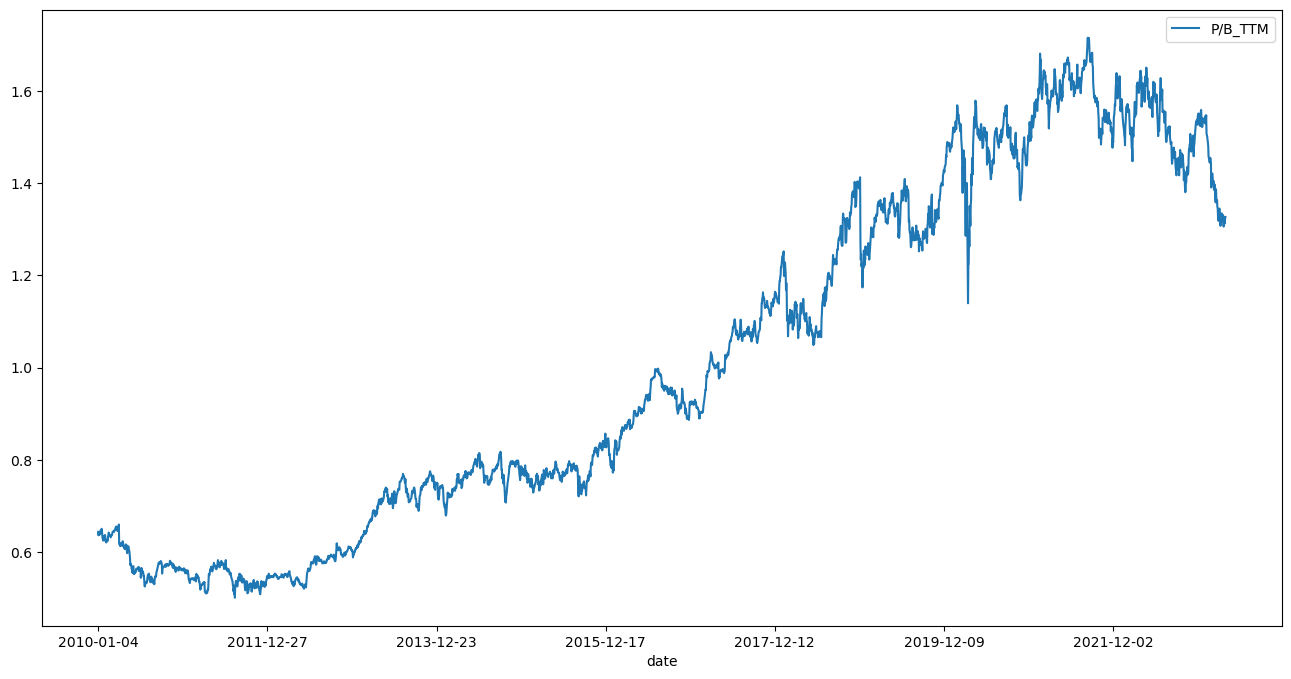

In [6]:
df[['date','P/B_TTM']].set_index('date').plot(figsize=(16,8));

In [7]:
import glob
path = '/Users/danielbarrera/Downloads/Market_Data/'
files = glob.glob(path+'*.csv')
btop = pd.DataFrame()
for i in range(len(files)):
    f = files[i]
    ticker = f.split('/')[-1].split('_')[0]
    df = pd.read_csv(path+ticker+'_Mkt_Data.csv')
    temp = df[['date','P/B_TTM']]
    temp.columns = ['date',ticker]
    if i==0:
        btop = temp.copy()
    else:
        btop = btop.merge(temp, how='outer')

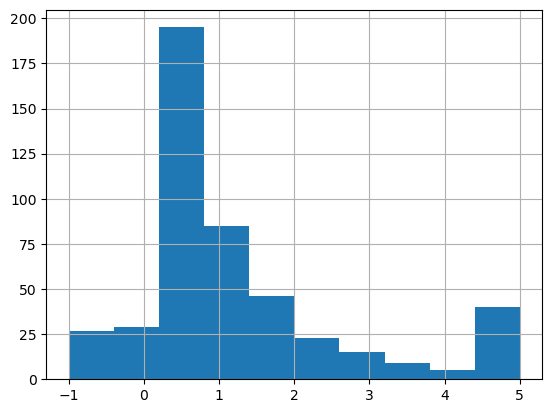

In [8]:
btop_one_date = pd.DataFrame(btop.iloc[-1].drop(['date']))
#btop_one_date = 1.0/btop_one_date
btop_one_date.columns=['one_date']
btop_one_date[btop_one_date.one_date>5] = 5
btop_one_date[btop_one_date.one_date<-1] = -1
btop_one_date['one_date'].hist();

In [9]:
btop_one_date = 1.0/btop_one_date